In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv3D, MaxPooling3D

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PATH = 'data'
fileList_ori = os.listdir(PATH)
labels = {'Alanine':0, 'glycine':1, 'Aspartic_acid':2, 'Cysteine':3,
         'Glutamic_acid':4, 'Homocysteine':5, 'Isoleucine':6, 'Leucine':7,
         'Lysine':8, 'Methionine':9, 'Norvaline':10, 'Phenylalanine':11,
         'Pipecolic_acid':12, 'Proline':13, 'Valine':14, 'alpha_Aminobutyric_acid':15,
         'beta_Aminoisobutyric_acid':16, '11_Eicosenic_acid':17, 'Arachidonic_acid':18, 
          'Decanoic_acid':19, 'Docosahexaenoic_acid':20, 'Docosanoic_acid':21,
          'Docosapentaenoic_acid':22, 'Dodecanoic_acid':23, 'Eicosanoic_acid':24,
          'Eicosapentaenoic_acid':25, 'Erucic_acid':26, 'Hexacosanoic_acid':27,
          'Hexanoic_acid':28, 'Linoleic_acid':29, 'Nervonic_acid':30,
          'Octadecanoic_acid':31, 'Octanoic_acid':32, 'Oleic_acid':33,
          'Palmitic_acid':34, 'Tetracosanoic_acid':35, 'Tetradecanoic_acid':36,
          'alpha_Linoleic_acid':37, 'cis_9_Hexadecenoic_acid':38, 
          'cis_9_Tetradecanoic_acid':39, '2OH_Butyric_acid':40, '2OH_Glutaric_acid':41, 
          '3OH_Butyric_acid':42, '4OH_Phenylactic_acid':43, 'Fumaric_acid':44,
          'Glycolic_acid':45, 'Lactic_acid':46, 'Malic_acid':47,
          'Malonic_acid':48, 'Oxaloacetic_acid':49, 'Succinic_acid':50,
          'alpha_ketoglutaric_acid':51, 'cis_Aconitic':52,
          'pyruvic_acid':53}


fileList = []
for i in range(len(fileList_ori)):
    for j in range(1):
        fileList.append(fileList_ori[i])

In [3]:
train_num = len(fileList)

input_x = 32
input_y = 32 
input_z = 32

x_train = np.zeros((train_num, input_x, input_y, input_z, 1))
y_train = np.zeros((train_num, 54))

for j in range(len(fileList)):
    
    print ("{}/{} - {} loaded".format(j, len(fileList), PATH+'/'+fileList[j]))
    
    dfs = pd.read_excel(PATH+'/'+fileList[j], sheet_name='Sheet1')
    index = dfs.columns
    label = fileList[j].split('-')
    #print label

    tmp = []
    for i in range(len(dfs)):
        tmp.append([dfs[index[0]][i], dfs[index[1]][i], dfs[index[2]][i]])
    tmp = np.asarray(tmp)

    xData = tmp[:,0]/max(tmp[:,0]) * (input_x-1)
    yData = tmp[:,1]/max(tmp[:,1]) * (input_y-1)
    zData = tmp[:,2]/max(tmp[:,2]) * (input_z-1)

    for i in range(len(xData)):
        #print ('x:{}, y:{}, z:{}'.format(int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i]))))
        x_train[j, int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i])), 0] = 1
        y_train[j, labels[label[0]]] = 1

0/73 - data/Oxaloacetic_acid-standard.xlsx loaded
1/73 - data/cis_9_Tetradecanoic_acid-STD.xlsx loaded
2/73 - data/Glycolic_acid-sample.xlsx loaded
3/73 - data/Arachidonic_acid-STD.xlsx loaded
4/73 - data/Norvaline-standard.xlsx loaded
5/73 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
6/73 - data/Succinic_acid-standard.xlsx loaded
7/73 - data/Pipecolic_acid-standard.xlsx loaded
8/73 - data/Octadecanoic_acid-STD.xlsx loaded
9/73 - data/pyruvic_acid-sample.xlsx loaded
10/73 - data/Homocysteine-standard.xlsx loaded
11/73 - data/Decanoic_acid-STD.xlsx loaded
12/73 - data/Glutamic_acid-standard.xlsx loaded
13/73 - data/Hexanoic_acid-STD.xlsx loaded
14/73 - data/4OH_Phenylactic_acid-standard.xlsx loaded
15/73 - data/Tetracosanoic_acid-STD.xlsx loaded
16/73 - data/cis_Aconitic-standard.xlsx loaded
17/73 - data/Lactic_acid-standard.xlsx loaded
18/73 - data/Leucine-standard.xlsx loaded
19/73 - data/Isoleucine-standard.xlsx loaded
20/73 - data/Fumaric_acid-sample.xlsx loaded
21/73 - data/

In [4]:
index = np.arange(len(fileList))
np.random.shuffle(index)

x_train_shuffle = np.zeros((train_num, input_x, input_y, input_z, 1))
y_train_shuffle = np.zeros((train_num, 54))
for i in range(len(index)):
    x_train_shuffle[i] = x_train[index[i]]
    y_train_shuffle[i] = y_train[index[i]]

In [5]:
test_num = len(fileList_ori)

x_test = np.zeros((test_num, input_x, input_y, input_z, 1))
y_test = np.zeros((test_num, 54))

for j in range(len(fileList_ori)):
    
    print "{}/{} - {} loaded".format(j, len(fileList_ori), PATH+'/'+fileList_ori[j])
        
    dfs = pd.read_excel(PATH+'/'+fileList_ori[j], sheet_name='Sheet1')
    index = dfs.columns
    label = fileList_ori[j].split('-')
    #print label

    tmp = []
    for i in range(len(dfs)):
        tmp.append([dfs[index[0]][i], dfs[index[1]][i], dfs[index[2]][i]])
    tmp = np.asarray(tmp)

    xData = tmp[:,0]/max(tmp[:,0]) * (input_x-1)
    yData = tmp[:,1]/max(tmp[:,1]) * (input_y-1)
    zData = tmp[:,2]/max(tmp[:,2]) * (input_z-1)

    for i in range(len(xData)):
        #print ('x:{}, y:{}, z:{}'.format(int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i]))))
        x_test[j, int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i])), 0] = 1
        y_test[j, labels[label[0]]] = 1

0/73 - data/Oxaloacetic_acid-standard.xlsx loaded
1/73 - data/cis_9_Tetradecanoic_acid-STD.xlsx loaded
2/73 - data/Glycolic_acid-sample.xlsx loaded
3/73 - data/Arachidonic_acid-STD.xlsx loaded
4/73 - data/Norvaline-standard.xlsx loaded
5/73 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
6/73 - data/Succinic_acid-standard.xlsx loaded
7/73 - data/Pipecolic_acid-standard.xlsx loaded
8/73 - data/Octadecanoic_acid-STD.xlsx loaded
9/73 - data/pyruvic_acid-sample.xlsx loaded
10/73 - data/Homocysteine-standard.xlsx loaded
11/73 - data/Decanoic_acid-STD.xlsx loaded
12/73 - data/Glutamic_acid-standard.xlsx loaded
13/73 - data/Hexanoic_acid-STD.xlsx loaded
14/73 - data/4OH_Phenylactic_acid-standard.xlsx loaded
15/73 - data/Tetracosanoic_acid-STD.xlsx loaded
16/73 - data/cis_Aconitic-standard.xlsx loaded
17/73 - data/Lactic_acid-standard.xlsx loaded
18/73 - data/Leucine-standard.xlsx loaded
19/73 - data/Isoleucine-standard.xlsx loaded
20/73 - data/Fumaric_acid-sample.xlsx loaded
21/73 - data/

In [6]:
nb_filters = [32, 32]
nb_conv = [3, 3]
nb_pool = [2, 2]
nb_classes = 54

model = Sequential()
model.add(Conv3D(nb_filters[0], (nb_conv[0], nb_conv[0], nb_conv[0]), input_shape=(input_x, input_y, input_z, 1), activation='relu'))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Conv3D(nb_filters[0], (nb_conv[0], nb_conv[0], nb_conv[0]), input_shape=(input_x, input_y, input_z, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, kernel_initializer='normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['mse', 'accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 13, 13, 13, 32)    27680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 13, 32)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70304)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8999040   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
nb_epoch = 100
batch_size = 32

hist = model.fit( x_train_shuffle, y_train_shuffle, batch_size=batch_size, epochs = nb_epoch, shuffle=True)

Epoch 1/100
73/73 [==============================] - 6s 83ms/step - loss: 4.0130 - mse: 0.0182 - accuracy: 0.0137
Epoch 2/100
73/73 [==============================] - 6s 80ms/step - loss: 3.9957 - mse: 0.0182 - accuracy: 0.0137
Epoch 3/100
73/73 [==============================] - 6s 77ms/step - loss: 3.9368 - mse: 0.0181 - accuracy: 0.0411
Epoch 4/100
73/73 [==============================] - 6s 77ms/step - loss: 3.8921 - mse: 0.0181 - accuracy: 0.0411
Epoch 5/100
73/73 [==============================] - 6s 80ms/step - loss: 3.8083 - mse: 0.0180 - accuracy: 0.1233
Epoch 6/100
73/73 [==============================] - 6s 76ms/step - loss: 3.7806 - mse: 0.0180 - accuracy: 0.0822
Epoch 7/100
73/73 [==============================] - 5s 74ms/step - loss: 3.6684 - mse: 0.0179 - accuracy: 0.2055
Epoch 8/100
73/73 [==============================] - 5s 74ms/step - loss: 3.4259 - mse: 0.0176 - accuracy: 0.3425
Epoch 9/100
73/73 [==============================] - 6s 76ms/step - loss: 3.2300 - mse: 

73/73 [==============================] - 5s 75ms/step - loss: 0.0458 - mse: 3.8524e-04 - accuracy: 0.9863
Epoch 73/100
73/73 [==============================] - 6s 79ms/step - loss: 0.0933 - mse: 8.2703e-04 - accuracy: 0.9726
Epoch 74/100
73/73 [==============================] - 6s 78ms/step - loss: 0.1534 - mse: 0.0014 - accuracy: 0.9452
Epoch 75/100
73/73 [==============================] - 6s 76ms/step - loss: 0.0425 - mse: 2.7503e-04 - accuracy: 1.0000
Epoch 76/100
73/73 [==============================] - 5s 74ms/step - loss: 0.1140 - mse: 0.0011 - accuracy: 0.9589
Epoch 77/100
73/73 [==============================] - 6s 77ms/step - loss: 0.1272 - mse: 0.0012 - accuracy: 0.9589
Epoch 78/100
73/73 [==============================] - 5s 75ms/step - loss: 0.0317 - mse: 1.3592e-04 - accuracy: 1.0000
Epoch 79/100
73/73 [==============================] - 5s 75ms/step - loss: 0.1725 - mse: 0.0018 - accuracy: 0.9452
Epoch 80/100
73/73 [==============================] - 5s 74ms/step - loss: 0.

In [8]:
score = model.evaluate(x_test, y_test, batch_size=batch_size) #show_accuracy=True
classes= model.predict_classes(x_test)
print('**********************************************')
print('Test score:', score)
print('History', hist.history)
print('**********************************************')
for i in range(len(classes)):
    print('Label: {}, Predicted: {}'.format(list(labels.keys())[list(labels.values()).index(np.argmax(y_test[i]))], 
                                            list(labels.keys())[list(labels.values()).index(classes[i])]))

73/73 [==============================] - 0s 4ms/step
**********************************************
('Test score:', [0.002824659781428437, 3.909159659087891e-06, 1.0])
('History', {'loss': [4.0129961183626355, 3.9957389570262336, 3.936774057884739, 3.892142681226338, 3.8082500059310704, 3.7805818988852304, 3.6684132144875723, 3.425908389156812, 3.229959295220571, 3.0344116426494026, 2.9038720751461917, 2.6045036642518764, 2.5070318097937596, 2.160987919324065, 2.0364318792134117, 1.7880705252085647, 1.731170077846475, 1.336227255324795, 1.315266780657311, 1.4290490868973404, 1.3092720279954884, 0.9693626255205233, 0.9248354696247676, 0.8203607536342046, 0.7984191032305156, 0.8676476151975867, 0.8158769117642756, 0.5929352330834898, 0.735332966667332, 0.5261291710481252, 0.6360112575635518, 0.4395715112555517, 0.4191046389814925, 0.4242569546993465, 0.3235310393653504, 0.3679032856470918, 0.3352046988598288, 0.4122329582906749, 0.38767709062524036, 0.33997291122397333, 0.311350404807966

In [77]:
print(np.array(y_test))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


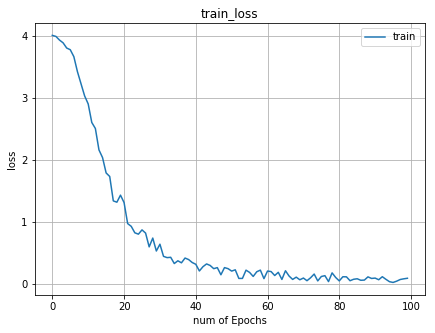

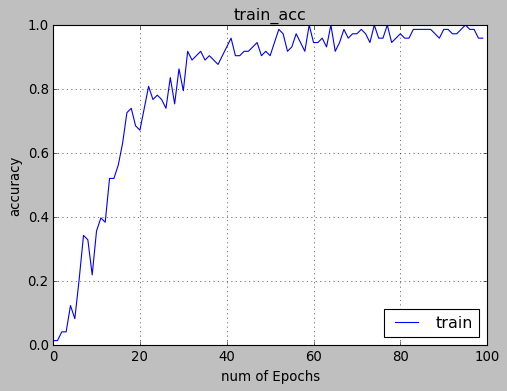

In [9]:
# Plot the results
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
#val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss') # vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc') # vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])